In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# I loaded the data from the CSV file into the dataframe
# I added the different neighborhoods to a list and printed them
df = pd.read_csv("C:/Users/yanni/OneDrive/Documenten/MADE_Data 1/Week 4_listings_GEBRUIK DEZE.csv.gz")
data_points = df['neighbourhood_cleansed'].tolist()
print(data_points)

['Noord-Oost', 'Westerpark', 'Westerpark', 'Zuid', 'Centrum-West', 'Slotervaart', 'Centrum-Oost', 'Centrum-Oost', 'Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost', 'Centrum-West', 'Centrum-West', 'Centrum-Oost', 'Centrum-Oost', 'Buitenveldert - Zuidas', 'Centrum-West', 'Centrum-Oost', 'Centrum-West', 'IJburg - Zeeburgereiland', 'Centrum-Oost', 'Zuid', 'Oud-Oost', 'Centrum-West', 'Centrum-West', 'De Pijp - Rivierenbuurt', 'Slotervaart', 'Zuid', 'De Pijp - Rivierenbuurt', 'Oud-Oost', 'Noord-Oost', 'De Baarsjes - Oud-West', 'Centrum-West', 'De Baarsjes - Oud-West', 'De Pijp - Rivierenbuurt', 'Centrum-West', 'Zuid', 'Centrum-Oost', 'De Baarsjes - Oud-West', 'De Pijp - Rivierenbuurt', 'Centrum-West', 'Centrum-West', 'De Baarsjes - Oud-West', 'Centrum-West', 'De Baarsjes - Oud-West', 'Centrum-Oost', 'Centrum-West', 'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West', 'Zuid', 'Bos en Lommer', 'Centrum-West', 'Zuid', 'Centrum-West', 'Centrum-West', 'Oud-Oost', 'Centrum-West', 'Oud-Oost

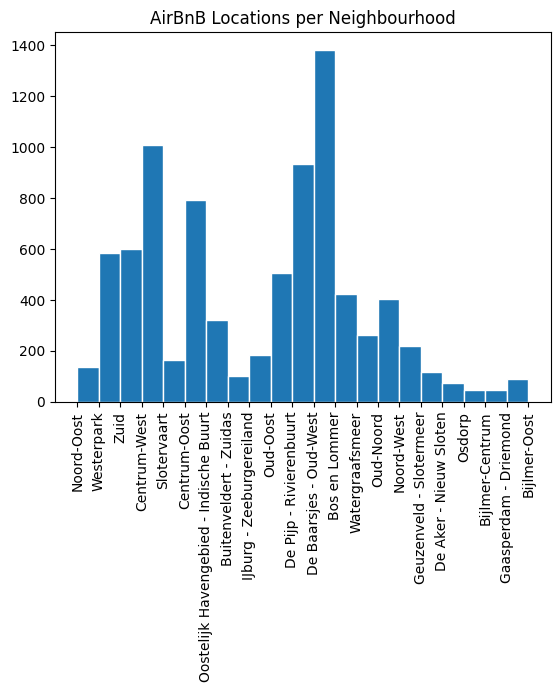

In [3]:
# Question 3.2

import pandas as pd
import matplotlib.pyplot as plt

# I loaded the data from the CSV file into the dataframe
# To make a list with the data I then chose the neighbourhood_cleansed column
# I defined the number of bins for the graph
df = pd.read_csv("C:/Users/yanni/OneDrive/Documenten/MADE_Data 1/Week 4_listings_GEBRUIK DEZE.csv.gz")
data_points = df['neighbourhood_cleansed'].tolist()
n_bins = 21

# And created a new figure and axis for the graph
fig, ax = plt.subplots()

# I made a plot of the data points with specified number of bins, then I used 'ec' to make the edges of the bars white
ax.hist(data_points, ec='white', bins=n_bins)

# To improve the readability I rotated the labels
plt.xticks(rotation=90)

rects = ax.patches

# I set the title for the graph and plotted it
plt.title('AirBnB Locations per Neighbourhood')
plt.show()

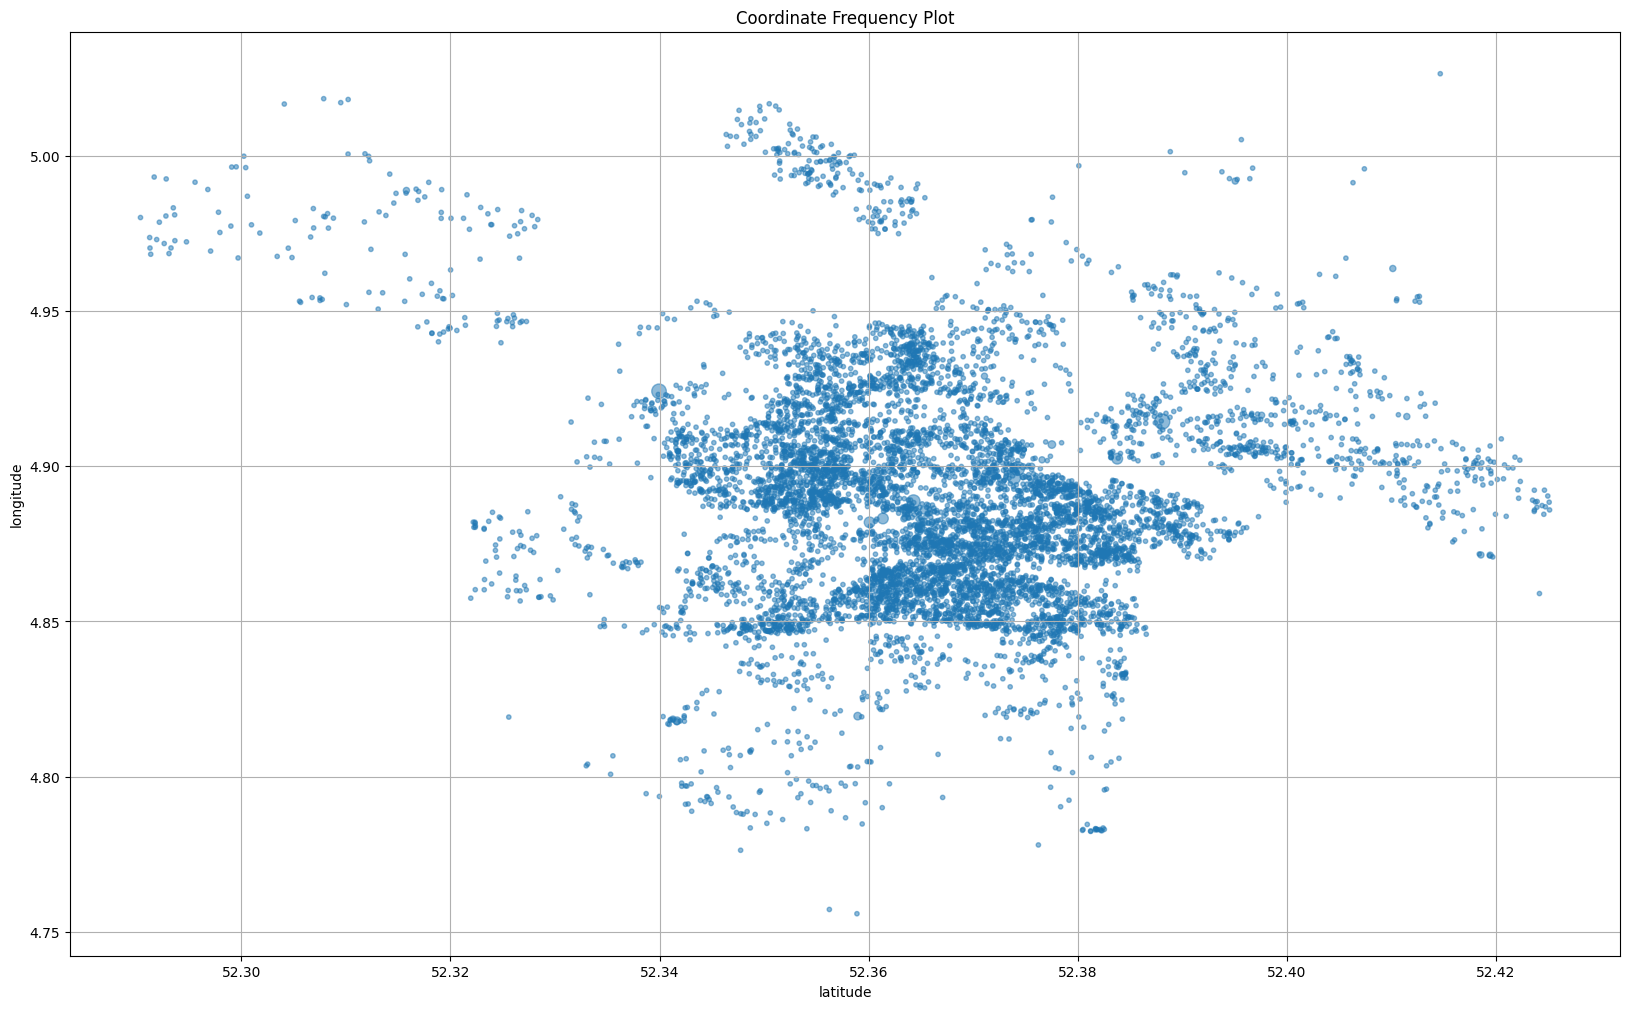

In [2]:
# Question 3.3 (old)
# We originally created this graph, but later decided to make a revisited version using folium

import pandas as pd
import matplotlib.pyplot as plt

# I loaded the data from the CSV file into the dataframe
df = pd.read_csv("C:/Users/yanni/OneDrive/Documenten/MADE_Data 1/Week 4_listings_GEBRUIK DEZE.csv.gz")

# I counted the frequency of each pair of coordinates
coordinate_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='Frequency')

# I set the size of the graph
# Then I created a scatter plot
# I set the latitude on the x-axis and the longitude on the y-axis
plt.figure(figsize=(20, 12))
plt.scatter(coordinate_counts['latitude'], coordinate_counts['longitude'], s=coordinate_counts['Frequency'] * 10, alpha=0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.grid(True)

# I chose the title of the graph and plotted it
plt.title('Coordinate Frequency Plot')
plt.show()


In [33]:
# Question 3.3 
# Most common coordinate, the closest we could find to the most common street

import pandas as pd

# I loaded the data from the CSV file into the dataframe
df = pd.read_csv("C:/Users/yanni/OneDrive/Documenten/MADE_Data 1/Week 4_listings_GEBRUIK DEZE.csv.gz")

# I counted the frequency of each pair of coordinates
coordinate_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='Frequency')

# Then I found the coordinate pair with the highest frequency
most_common_coordinate = coordinate_counts.sort_values(by='Frequency', ascending=False).iloc[0]

#I printed the info of said coordinate
print("Most Common Coordinate:")
print("latitude:", most_common_coordinate['latitude'])
print("longitude:", most_common_coordinate['longitude'])
print("Frequency:", most_common_coordinate['Frequency'])


Most Common Coordinate:
latitude: 52.3881
longitude: 4.91438
Frequency: 12.0


In [ ]:
# Question 3.3 (new using Folium)

import pandas as pd
import folium

# I loaded the data from the CSV file into the dataframe
df = pd.read_csv("C:/Users/yanni/OneDrive/Documenten/MADE_Data 1/Week 4_listings_GEBRUIK DEZE.csv.gz")

# I counted the frequency of each pair of coordinates
coordinate_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='Frequency')

# Then I created a Folium map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# I added markers to the map on all the locations where AirBnB's are found
for index, row in coordinate_counts.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Frequency: {row['Frequency']}",
        fill=True,
        fill_color='blue',
    ).add_to(m)

#I plotted the map and saved it as an HTML file
m.save("coordinate_map.html")
m


In [7]:
import pandas as pd
import folium

# I loaded the data from the CSV file into the dataframe
df = pd.read_csv("C:/Users/yanni/OneDrive/Documenten/MADE_Data 1/Week 4_listings_GEBRUIK DEZE.csv.gz")

# I counted the frequency of each pair of coordinates
coordinate_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='Frequency')

# Then I found the coordinate pair with the highest frequency
most_common_coordinate = coordinate_counts.sort_values(by='Frequency', ascending=False).iloc[0]

# I printed the info of the most common coordinate
print("Most Common Coordinate:")
print("latitude:", most_common_coordinate['latitude'])
print("longitude:", most_common_coordinate['longitude'])
print("Frequency:", most_common_coordinate['Frequency'])

# I created a map centered around the most common coordinate
map_center = [most_common_coordinate['latitude'], most_common_coordinate['longitude']]
m = folium.Map(location=map_center, zoom_start=15)

# And added a marker for the most common coordinate
folium.Marker(
        location=map_center,
        popup=f"Most Common Coordinate\nFrequency: {most_common_coordinate['Frequency']}",
        fill=True,
        fill_color='blue',
    ).add_to(m)

# Then I saved the map as an HTML file
m.save("most_common_coordinate_map.html")

m


Most Common Coordinate:
latitude: 52.3881
longitude: 4.91438
Frequency: 12.0
